### **Imported Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(color_codes=True)

### **Data Loading**

**About Dataset**

In this notebook, we will be working on Contract dataset.


*Contract Table:*
Table containing the list of contracts in the factoring context, including REF_CTR, STATUT_CTR, REF_CTR_PAPIER_CTR, TYP_CTR, DAT_SIGN_CTR, DAT_DEB_CTR, DAT_RESIL_CTR, DAT_PROCH_VERS_CTR, CA_CTR, CA_EXP_CTR, CA_IMP_CTR, LIM_FIN_CTR, DEVISE_CTR, NB_ACH_PREVU_CTR, NB_FACT_PREVU_CTR, NB_AVOIRS_PREVU_CTR, NB_REMISES_PREVU_CTR, DELAI_MOYEN_REG_CTR, DELAI_MAX_REG_CTR and MIN_COMM_FACT.


**Related Attributes**

*Contract Table:*

| REF_CTR              | Reference du   contrat                       | int            |
|----------------------|----------------------------------------------|----------------|
| STATUT_CTR           | Satut du contrat                             | varchar(20)    |
| REF_CTR_PAPIER_CTR   | Reference Papier du   contrat                | varchar(40)    |
| TYP_CTR              | Type du contrat                              | char(5)        |
| DAT_SIGN_CTR         | Date signature                               | date           |
| DAT_DEB_CTR          | Date debut                                   | date           |
| DAT_RESIL_CTR        | Date Resilisation                            | date           |
| DAT_PROCH_VERS_CTR   | Date   d'anniversaire                        | date           |
| CA_CTR               | Chiffre   d'affaire                          | decimal(15, 3) |
| CA_EXP_CTR           | Chiffre d'affaire   Export                   | decimal(15, 3) |
| CA_IMP_CTR           | Chiffre d'affaire   Import                   | decimal(15, 3) |
| LIM_FIN_CTR          | Limite Financement                           | decimal(15, 3) |
| DEVISE_CTR           | Devise du contrat                            | char(3)        |
| NB_ACH_PREVU_CTR     | Nbre Acheteur dans le   contrat              | smallint       |
| NB_FACT_PREVU_CTR    | Nbre de facture dans   le contrat            | smallint       |
| NB_AVOIRS_PREVU_CTR  | Nbre d'avoir dans le   contrat               | smallint       |
| NB_REMISES_PREVU_CTR | Nbre de remise dans   le contrat             | smallint       |
| DELAI_MOYEN_REG_CTR  | Delai Moyen de   reglement                   | smallint       |
| DELAI_MAX_REG_CTR    | Delai Max du   reglement                     | smallint       |
| MIN_COMM_FACT        | commission Minimum de   factoring du contrat | decimal(15, 3) |

In [2]:
# Loading data into dataframe
ctr_data = pd.read_csv('T_CONTRAT.csv', parse_dates=['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR'])

In [3]:
# Displaying first 5 rows
ctr_data.head(10)

,REF_CTR,STATUT_CTR,REF_CTR_PAPIER_CTR,SERVICE_CTR,TYP_CTR,DAT_SIGN_CTR,DAT_DEB_CTR,DAT_RESIL_CTR,DAT_PROCH_VERS_CTR,CA_CTR,...,DEVISE_CTR,NB_ACH_PREVU_CTR,NB_FACT_PREVU_CTR,NB_AVOIRS_PREVU_CTR,NB_REMISES_PREVU_CTR,DELAI_MOYEN_REG_CTR,DELAI_MAX_REG_CTR,FACT_REG_CTR,DERN_MONT_DISP_2,MIN_COMM_FACT
0,8,V,001/2014,NaN,0,2014-04-01,2014-04-01,NaT,NaT,0.000000e+00,...,TND,0,0,0,0,0,0.0,True,0.0,NaN
1,9,A,001/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,4.000000e+06,...,TND,90,90,0,90,120,120.0,True,0.0,NaN
2,10,V,002/2014,NaN,0,2014-01-27,2014-01-27,2014-02-11,2014-02-11,5.000000e+06,...,TND,10,90,0,90,90,120.0,True,0.0,NaN
3,11,V,004/2014,NaN,0,2014-01-27,2014-01-27,2014-02-12,2014-02-12,1.500000e+06,...,TND,50,80,0,0,120,120.0,True,0.0,NaN
4,18,V,003/2013,NaN,0,2014-02-12,2014-02-12,2014-02-12,2014-02-12,2.566484e+05,...,TND,10,30,0,0,90,90.0,True,0.0,NaN
5,19,V,005/2014,NaN,0,2014-02-12,2014-02-12,2014-02-12,2014-02-12,1.000000e+06,...,TND,50,50,0,0,90,90.0,True,0.0,NaN
6,20,V,006/2014,NaN,0,2014-01-27,2014-01-27,2014-02-12,2014-02-12,2.000000e+05,...,TND,60,50,0,0,120,120.0,True,0.0,NaN
7,21,V,003/2014,NaN,0,2014-02-13,2014-02-13,2014-02-13,2014-02-13,3.500000e+07,...,TND,90,150,0,0,120,120.0,True,0.0,NaN
8,22,V,007/2014,NaN,0,2014-02-13,2014-02-13,2014-02-13,2014-02-13,4.100000e+06,...,TND,90,90,10,192,45,50.0,True,0.0,NaN
9,23,V,NaN,NaN,0,2012-05-15,2014-02-27,2014-02-27,2014-02-27,2.200000e+04,...,TND,2,2,0,0,90,90.0,True,0.0,NaN


### **EDA - Exploratory Data Analysis**

##### **Contract Table**

In [4]:
# Checking contract dataset dimension (shape)
ctr_data.shape

(126, 23)

It appears we have **126** observations and **23** features (fields) in the dataset.

In [5]:
# Returning all the datatypes used in the dataset
ctr_data.dtypes

REF_CTR                          int64
STATUT_CTR                      object
REF_CTR_PAPIER_CTR              object
SERVICE_CTR                    float64
TYP_CTR                          int64
DAT_SIGN_CTR            datetime64[ns]
DAT_DEB_CTR             datetime64[ns]
DAT_RESIL_CTR           datetime64[ns]
DAT_PROCH_VERS_CTR      datetime64[ns]
CA_CTR                         float64
CA_EXP_CTR                     float64
CA_IMP_CTR                     float64
LIM_FIN_CTR                    float64
DEVISE_CTR                      object
NB_ACH_PREVU_CTR                 int64
NB_FACT_PREVU_CTR                int64
NB_AVOIRS_PREVU_CTR              int64
NB_REMISES_PREVU_CTR             int64
DELAI_MOYEN_REG_CTR              int64
DELAI_MAX_REG_CTR              float64
FACT_REG_CTR                    object
DERN_MONT_DISP_2               float64
MIN_COMM_FACT                  float64
dtype: object

The dataset, as it's mentioning, revolves around 4 types: 4 objects, 7 int64, 8 float64 and 4 datetime64[ns] (**15** numerical attributes and **8** categorical attributes)

In [6]:
# Getting more statistical details
ctr_data.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_CTR,126.0,4.028571e+02,8.771540e+02,8.0,45.25,77.5,112.75,3.135000e+03
SERVICE_CTR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYP_CTR,126.0,2.063492e-01,4.439362e-01,0.0,0.00,0.0,0.00,2.000000e+00
CA_CTR,126.0,1.738617e+06,3.600415e+06,0.0,412500.00,775000.0,1500000.00,3.500000e+07
CA_EXP_CTR,126.0,1.587302e+04,1.781742e+05,0.0,0.00,0.0,0.00,2.000000e+06
CA_IMP_CTR,126.0,1.722744e+06,3.601231e+06,0.0,412500.00,675000.0,1500000.00,3.500000e+07
LIM_FIN_CTR,126.0,6.148836e+05,1.023292e+06,0.0,100000.00,300000.0,500000.00,7.500000e+06
NB_ACH_PREVU_CTR,126.0,1.823810e+01,2.873393e+01,0.0,5.00,10.0,15.00,2.000000e+02
NB_FACT_PREVU_CTR,126.0,8.738095e+01,1.678488e+02,0.0,20.00,50.0,100.00,1.500000e+03
NB_AVOIRS_PREVU_CTR,126.0,7.206349e+00,1.398474e+01,0.0,0.00,0.0,10.00,1.000000e+02


With the generated statistical measurements, we can gain insights into the central tendency, variability, and distribution of each attribute. For example, we can observe the average '**CA_CTR**' (chiffre d'affaires) is approximately 1.74 million, with a maximum of 35 million and a standard deviation of 3.60 million, indicating significant variability in the total sales covered by contracts. Similarly, '**LIM_FIN_CTR**' represents the maximum financing limit, and its mean is around 614,883, with a standard deviation of 1.02 million. However, it seems that some fields don't have a meaningful information like:
- **SERVICE_CTR**: This attribute seems to have missing values (NaN) for all records. As a result, it doesn't provide any meaningful information for analysis.
- **DERN_MONT_DISP_2**: This attribute seems to have missing values (NaN) for some records. It represents the last available amount for financing requests. 

In [7]:
# Checking missing values
ctr_data.isna().sum()

REF_CTR                   0
STATUT_CTR                0
REF_CTR_PAPIER_CTR        5
SERVICE_CTR             126
TYP_CTR                   0
DAT_SIGN_CTR              0
DAT_DEB_CTR               0
DAT_RESIL_CTR            23
DAT_PROCH_VERS_CTR        1
CA_CTR                    0
CA_EXP_CTR                0
CA_IMP_CTR                0
LIM_FIN_CTR               0
DEVISE_CTR                0
NB_ACH_PREVU_CTR          0
NB_FACT_PREVU_CTR         0
NB_AVOIRS_PREVU_CTR       0
NB_REMISES_PREVU_CTR      0
DELAI_MOYEN_REG_CTR       0
DELAI_MAX_REG_CTR         1
FACT_REG_CTR             22
DERN_MONT_DISP_2         24
MIN_COMM_FACT           104
dtype: int64

In the dataset, several fields have missing values including :
- REF_CTR_PAPIER_CTR        5
- SERVICE_CTR             126
- DAT_RESIL_CTR            23
- DAT_PROCH_VERS_CTR        1
- DELAI_MAX_REG_CTR         1
- FACT_REG_CTR             22
- DERN_MONT_DISP_2         24
- MIN_COMM_FACT           104

In [8]:
# Check the number of unique value from all of the object datatype
ctr_data.select_dtypes(include='object').nunique()

STATUT_CTR              3
REF_CTR_PAPIER_CTR    109
DEVISE_CTR              1
FACT_REG_CTR            1
dtype: int64

In [9]:
ctr_data.select_dtypes(include='object').sample(5)

,STATUT_CTR,REF_CTR_PAPIER_CTR,DEVISE_CTR,FACT_REG_CTR
40,V,003/2016,TND,True
102,V,015/2019,TND,True
48,V,013/2016,TND,True
64,V,015/2017,TND,True
92,V,010/2019,TND,True


In [10]:
ctr_data['STATUT_CTR'].unique()

array(['V    ', 'A    ', 'C    '], dtype=object)

According to the result, there are 2 attributes containing only same value (**DEVISE_CTR**,	**FACT_REG_CTR**), 3 different status under **STATUS_CTR** and 109 for **REF_CTR_PAPIER_CTR**.

Obviously, we can end up dropping down REF_CTR_PAPIER_CTR, DEVISE_CTR and FACT_REG_CTR as they won't help to identifying patterns because of their meaningless existence.

In [11]:
ctr_data_cat_vars = list(ctr_data.select_dtypes(include='object').columns)
ctr_data_cat_vars.remove('REF_CTR_PAPIER_CTR')
ctr_data_cat_vars

['STATUT_CTR', 'DEVISE_CTR', 'FACT_REG_CTR']

<function matplotlib.pyplot.show(close=None, block=None)>

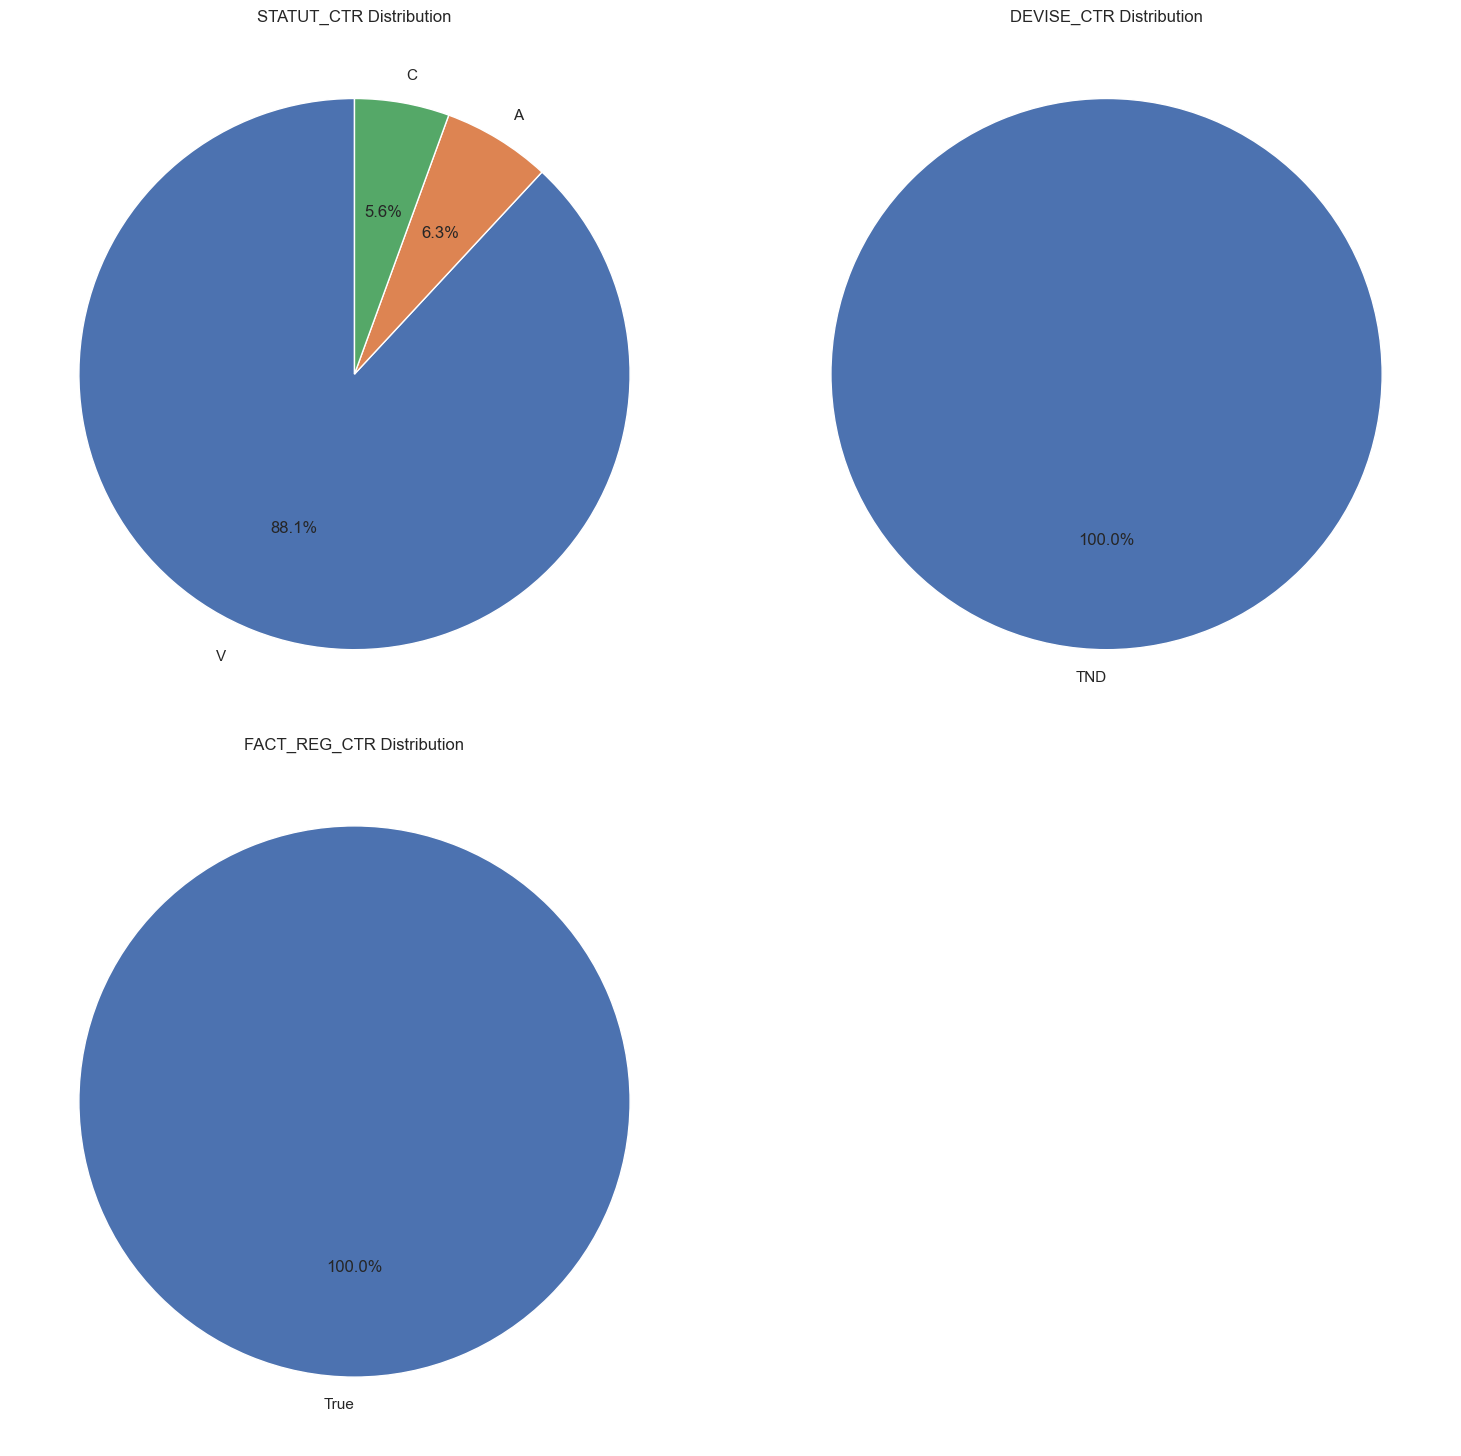

In [12]:
# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Create a pie chart for each categorical variables
for i, var in enumerate(ctr_data_cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_count = ctr_data[var].value_counts()

        axs.flat[i].pie(cat_count, labels=cat_count.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
fig.delaxes(axs[1][1])
plt.show

[(111, 'purple'), (8, 'blue'), (7, 'green')]


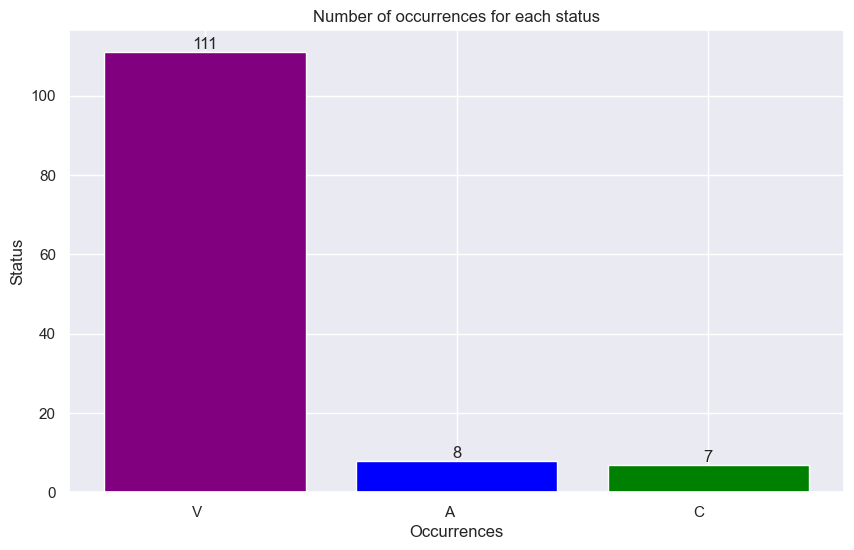

In [13]:
# Calculate the number of contracts for each status
colors = ['purple', 'blue', 'green']
status = []
for i, s in enumerate(ctr_data['STATUT_CTR'].unique()):
    status.append((len(ctr_data[ctr_data['STATUT_CTR'] == s]), colors[i]))
print(status)
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('Occurrences')
plt.ylabel('Status')
plt.title('Number of occurrences for each status')
for i, s in enumerate(ctr_data['STATUT_CTR'].unique()):
    plt.bar(s, status[i][0], color=status[i][1])
    plt.text(s, status[i][0], str(status[i][0]), ha='center', va='bottom')
plt.show()

Now that we went through some explorations on the categorical variables, it may be reasonable to keep only **STATUS_CTR** as it shows high variability among others. The other categorical variables seem to be handful in extracting patterns and clear structure.

Before we move on to checking outliers, let's check whether the dates are valid or no.

In [14]:
date_vars = [d for d in ctr_data.columns if d.startswith('DAT')]
date_vars

['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR']

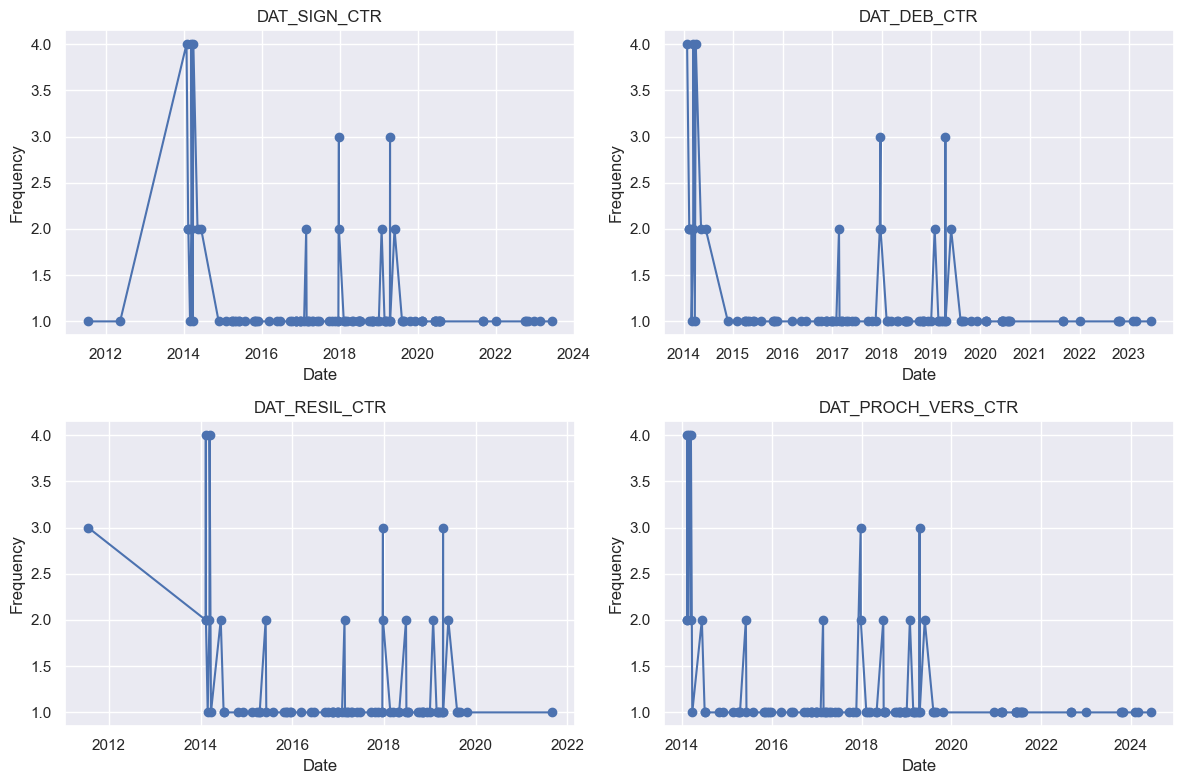

In [15]:
# Convert date fields to datetime data type
ctr_data[date_vars] = ctr_data[date_vars].apply(pd.to_datetime)

# Create a 2x2 subplot for the date fields
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot each date field in a separate subplot
for i, date_column in enumerate(date_vars):
    row, col = i // 2, i % 2
    date_counts = ctr_data[date_column].value_counts().sort_index()
    axes[row, col].plot(date_counts.index, date_counts.values, marker='o')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(date_column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

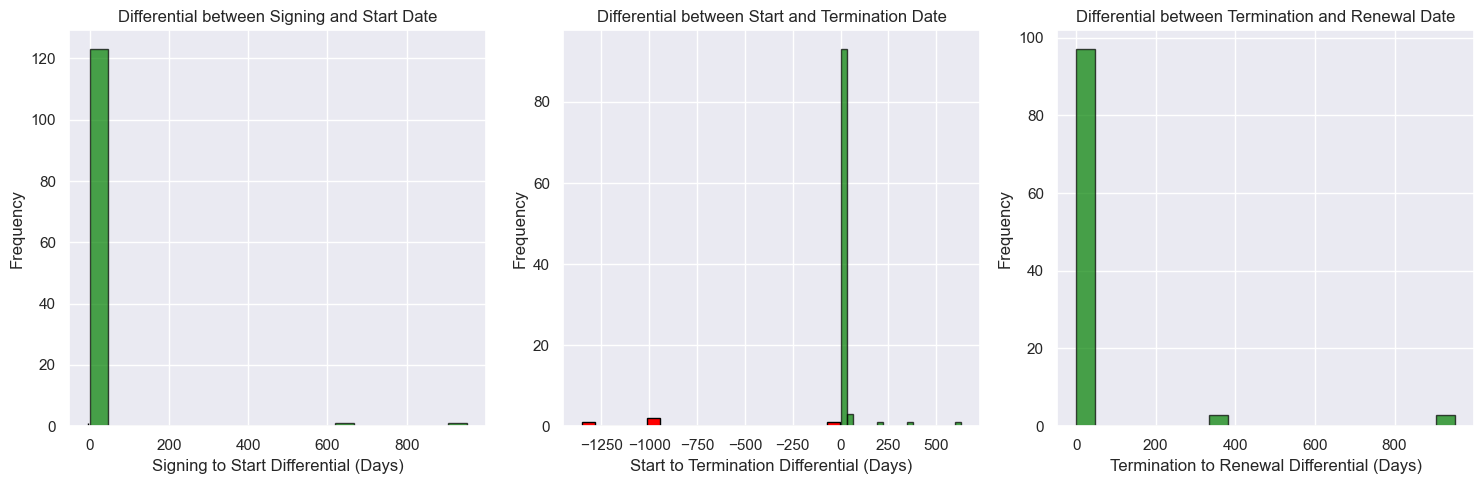

Number of negative differentials:
Sign_to_Start_Diff             1
Start_to_Termination_Diff      4
Termination_to_Renewal_Diff    0
dtype: int64


In [16]:
# Calculate the differentials
ctr_data['Sign_to_Start_Diff'] = (ctr_data['DAT_DEB_CTR'] - ctr_data['DAT_SIGN_CTR']).dt.days
ctr_data['Start_to_Termination_Diff'] = (ctr_data['DAT_RESIL_CTR'] - ctr_data['DAT_DEB_CTR']).dt.days
ctr_data['Termination_to_Renewal_Diff'] = (ctr_data['DAT_PROCH_VERS_CTR'] - ctr_data['DAT_RESIL_CTR']).dt.days

# Create the subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histograms for negative differentials
axes[0].hist(ctr_data[ctr_data['Sign_to_Start_Diff'] < 0]['Sign_to_Start_Diff'], bins=20, color='red', edgecolor='black')
axes[1].hist(ctr_data[ctr_data['Start_to_Termination_Diff'] < 0]['Start_to_Termination_Diff'], bins=20, color='red', edgecolor='black')
axes[2].hist(ctr_data[ctr_data['Termination_to_Renewal_Diff'] < 0]['Termination_to_Renewal_Diff'], bins=20, color='red', edgecolor='black')

# Plot the histograms for positive differentials
axes[0].hist(ctr_data[ctr_data['Sign_to_Start_Diff'] >= 0]['Sign_to_Start_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[1].hist(ctr_data[ctr_data['Start_to_Termination_Diff'] >= 0]['Start_to_Termination_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)
axes[2].hist(ctr_data[ctr_data['Termination_to_Renewal_Diff'] >= 0]['Termination_to_Renewal_Diff'], bins=20, color='green', edgecolor='black', alpha=0.7)

# Set labels and titles
axes[0].set_xlabel('Signing to Start Differential (Days)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Differential between Signing and Start Date')

axes[1].set_xlabel('Start to Termination Differential (Days)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Differential between Start and Termination Date')

axes[2].set_xlabel('Termination to Renewal Differential (Days)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Differential between Termination and Renewal Date')

# Check for negative differentials
negative_diffs = (ctr_data[['Sign_to_Start_Diff', 'Start_to_Termination_Diff', 'Termination_to_Renewal_Diff']] < 0).sum()

plt.tight_layout()
plt.show()

print("Number of negative differentials:")
print(negative_diffs)

In [17]:
ctr_data[ctr_data['Sign_to_Start_Diff']<0][['DAT_SIGN_CTR',	'DAT_DEB_CTR']]

,DAT_SIGN_CTR,DAT_DEB_CTR
37,2015-11-28,2015-11-25


In [18]:
ctr_data[ctr_data['Start_to_Termination_Diff']<0][['DAT_DEB_CTR', 'DAT_RESIL_CTR']]

,DAT_DEB_CTR,DAT_RESIL_CTR
10,2014-02-27,2011-07-21
11,2014-03-01,2011-07-21
27,2015-04-01,2011-07-21
64,2017-12-19,2017-12-18


With these visuals, we can conclude the existence of some anomalies and outliers between dates in the dataset:

- The leftmost subplot shows the distribution of time differentials between the signing date and the start date of the contracts.
Most of the contracts have positive differentials, indicating that they were signed well in advance of their start dates. This suggests that there is typically a preparation period between signing and the actual start of contract implementation.
There are very few contracts with negative differentials, which may indicate data entry errors or unusual cases where contracts were signed after they were supposed to start.

- The middle subplot represents the distribution of time differentials between the start date and the termination date of the contracts. 
The majority of contracts have positive differentials, implying that they had a valid duration between the start and termination dates. This aligns with the expectation that contracts typically run for a specific period before termination.
There are very few contracts with negative differentials, which may indicate also data entry errors or unusual cases where contracts were terminated before they were supposed to start.

- The rightmost subplot shows the distribution of time differentials between the termination date and the renewal date of the contracts.
Most contracts have positive differentials, indicating that there is usually a gap between the termination of one contract and the renewal of a new contract. This is a common practice in contract management, allowing time for assessment and negotiation before renewing.
There are no contracts with negative differentials, which is reasonable as contracts cannot be renewed before they are terminated.

In [19]:
# Drop the new generated columns (differentials)
ctr_data.drop(['Sign_to_Start_Diff', 'Start_to_Termination_Diff',
       'Termination_to_Renewal_Diff'], inplace=True, axis=1)
# Select columns with numerical data types
numerical_columns = ctr_data.select_dtypes(include=['int64', 'float64']).columns[3:]
# I eliminated 3 columns ('REF_CTR', 'SERVICE_CTR', 'TYPE_CTR') because no need for them later
numerical_columns

Index(['CA_CTR', 'CA_EXP_CTR', 'CA_IMP_CTR', 'LIM_FIN_CTR', 'NB_ACH_PREVU_CTR',
       'NB_FACT_PREVU_CTR', 'NB_AVOIRS_PREVU_CTR', 'NB_REMISES_PREVU_CTR',
       'DELAI_MOYEN_REG_CTR', 'DELAI_MAX_REG_CTR', 'DERN_MONT_DISP_2',
       'MIN_COMM_FACT'],
      dtype='object')

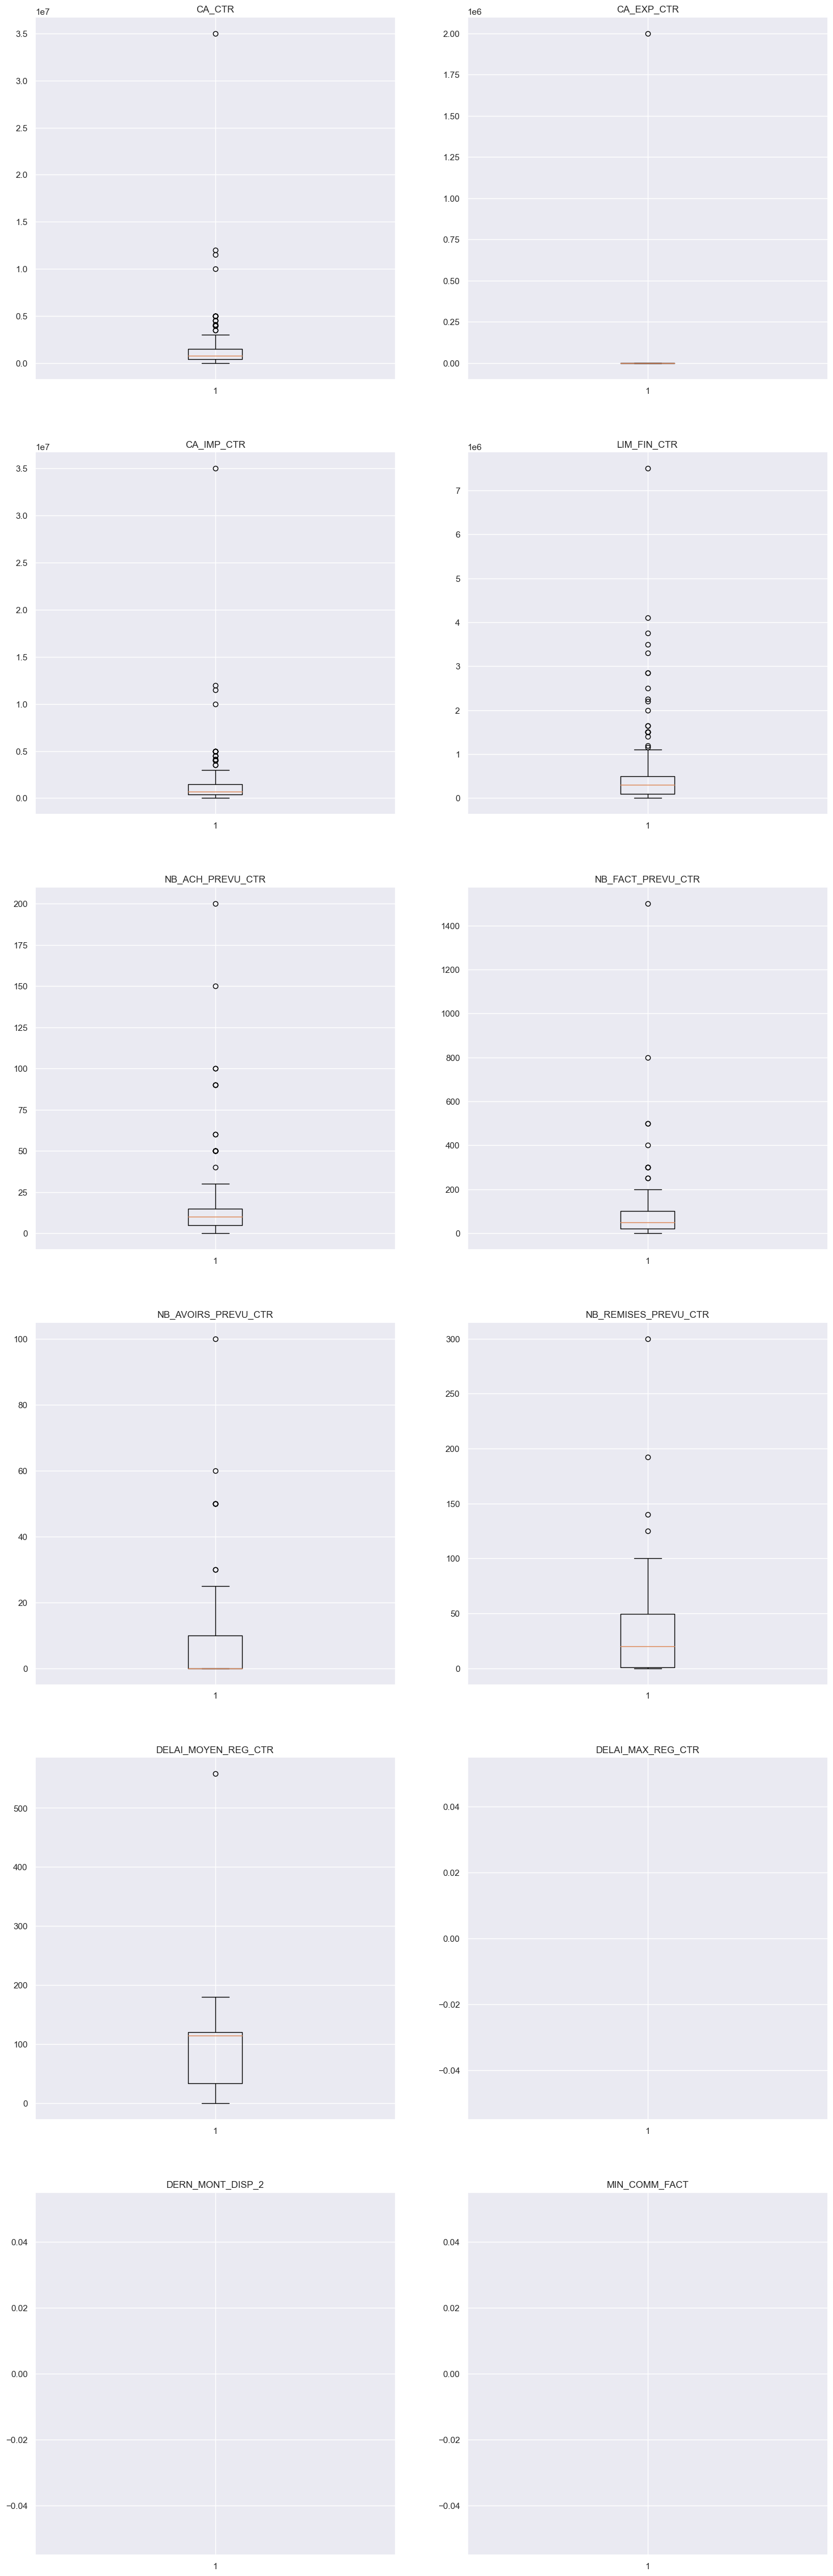

In [20]:
# Defining a function called "plot_boxplot" to plotting the outliers
#Boxplot is the suitable type of visualization for this purpose

def plot_boxplot(df, features):
    fig, ax = plt.subplots((len(features)//2), 2, figsize=(18, 58))
    y_axis = 0
    x_axis = 0
    for x, ft in enumerate(features):
        ax[y_axis, x_axis].boxplot(x = ft, data = df)
        ax[y_axis, x_axis].set_title(ft)
        if x_axis == 1:
            y_axis += 1
        if x % 2 == 0:
            x_axis = 1
        else:
            x_axis = 0
plot_boxplot(df=ctr_data, features=numerical_columns)


In [21]:
# Defining a function to get the output indices
def outliers(data, ft):
    # Calculate the IQR (Interquartile Range) for the column
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1

    # Define the outlier thresholds
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Return the indices of each outlier
    return data.index[(data[ft] < lower_threshold) | (data[ft] > upper_threshold)]

# Print the number of outliers
for col in numerical_columns:
    num_outliers = len(outliers(ctr_data, col))
    print(f'Number of outliers in {col} :', num_outliers)


Number of outliers in CA_CTR : 18
Number of outliers in CA_EXP_CTR : 1
Number of outliers in CA_IMP_CTR : 18
Number of outliers in LIM_FIN_CTR : 20
Number of outliers in NB_ACH_PREVU_CTR : 16
Number of outliers in NB_FACT_PREVU_CTR : 10
Number of outliers in NB_AVOIRS_PREVU_CTR : 8
Number of outliers in NB_REMISES_PREVU_CTR : 4
Number of outliers in DELAI_MOYEN_REG_CTR : 1
Number of outliers in DELAI_MAX_REG_CTR : 26
Number of outliers in DERN_MONT_DISP_2 : 1
Number of outliers in MIN_COMM_FACT : 4


Practically, all the attributes contain outliers and this may looks bad. For example, there are 18 data points in the "Chiffre d'affaires" attribute (CA_CTR) that are considered outliers. These outliers might represent unusually high or low values compared to the majority of the data points in the distribution.

In [22]:
# Group the data by contract ID and calculate the total CA_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_CTR'].sum()
total_sales = ctr_data['CA_CTR'].sum()
print(f'Total Sales {total_sales}\n-----------------------------\n')

# Print the total CA_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_CTR: {total_ca}")


Total Sales 219065782.412
-----------------------------

Contract ID: 8, Total CA_CTR: 0.0
Contract ID: 9, Total CA_CTR: 4000000.0
Contract ID: 10, Total CA_CTR: 5000000.0
Contract ID: 11, Total CA_CTR: 1500000.0
Contract ID: 18, Total CA_CTR: 256648.412
Contract ID: 19, Total CA_CTR: 1000000.0
Contract ID: 20, Total CA_CTR: 200000.0
Contract ID: 21, Total CA_CTR: 35000000.0
Contract ID: 22, Total CA_CTR: 4100000.0
Contract ID: 23, Total CA_CTR: 22000.0
Contract ID: 24, Total CA_CTR: 0.0
Contract ID: 25, Total CA_CTR: 5000000.0
Contract ID: 26, Total CA_CTR: 4000000.0
Contract ID: 27, Total CA_CTR: 1500000.0
Contract ID: 28, Total CA_CTR: 3500000.0
Contract ID: 29, Total CA_CTR: 1000000.0
Contract ID: 30, Total CA_CTR: 100000.0
Contract ID: 31, Total CA_CTR: 200000.0
Contract ID: 32, Total CA_CTR: 2500000.0
Contract ID: 33, Total CA_CTR: 150000.0
Contract ID: 34, Total CA_CTR: 150000.0
Contract ID: 35, Total CA_CTR: 1200000.0
Contract ID: 36, Total CA_CTR: 200000.0
Contract ID: 37, Tot

In [23]:
# Group the data by contract ID and calculate the total CA_IMP_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_IMP_CTR'].sum()
total_imp_sales = ctr_data['CA_IMP_CTR'].sum()
print(f'Total Imported Sales: {total_imp_sales}\n-----------------------------\n')

# Print the total CA_IMP_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_IMP_CTR: {total_ca}")


Total Imported Sales: 217065782.412
-----------------------------

Contract ID: 8, Total CA_IMP_CTR: 0.0
Contract ID: 9, Total CA_IMP_CTR: 4000000.0
Contract ID: 10, Total CA_IMP_CTR: 5000000.0
Contract ID: 11, Total CA_IMP_CTR: 1500000.0
Contract ID: 18, Total CA_IMP_CTR: 256648.412
Contract ID: 19, Total CA_IMP_CTR: 1000000.0
Contract ID: 20, Total CA_IMP_CTR: 200000.0
Contract ID: 21, Total CA_IMP_CTR: 35000000.0
Contract ID: 22, Total CA_IMP_CTR: 4100000.0
Contract ID: 23, Total CA_IMP_CTR: 22000.0
Contract ID: 24, Total CA_IMP_CTR: 0.0
Contract ID: 25, Total CA_IMP_CTR: 5000000.0
Contract ID: 26, Total CA_IMP_CTR: 4000000.0
Contract ID: 27, Total CA_IMP_CTR: 1500000.0
Contract ID: 28, Total CA_IMP_CTR: 3500000.0
Contract ID: 29, Total CA_IMP_CTR: 1000000.0
Contract ID: 30, Total CA_IMP_CTR: 100000.0
Contract ID: 31, Total CA_IMP_CTR: 200000.0
Contract ID: 32, Total CA_IMP_CTR: 2500000.0
Contract ID: 33, Total CA_IMP_CTR: 150000.0
Contract ID: 34, Total CA_IMP_CTR: 150000.0
Contrac

In [24]:
# Group the data by contract ID and calculate the total CA_EXP_CTR per contract
total_ca_per_contract = ctr_data.groupby('REF_CTR')['CA_EXP_CTR'].sum()
total_exp_sales = ctr_data['CA_EXP_CTR'].sum()
print(f'Total Exported Sales: {total_exp_sales}\n-----------------------------\n')

# Print the total CA_EXP_CTR per contract in a custom message
for contract_id, total_ca in total_ca_per_contract.items():
    print(f"Contract ID: {contract_id}, Total CA_EXP_CTR: {total_ca}")


Total Exported Sales: 2000000.0
-----------------------------

Contract ID: 8, Total CA_EXP_CTR: 0.0
Contract ID: 9, Total CA_EXP_CTR: 0.0
Contract ID: 10, Total CA_EXP_CTR: 0.0
Contract ID: 11, Total CA_EXP_CTR: 0.0
Contract ID: 18, Total CA_EXP_CTR: 0.0
Contract ID: 19, Total CA_EXP_CTR: 0.0
Contract ID: 20, Total CA_EXP_CTR: 0.0
Contract ID: 21, Total CA_EXP_CTR: 0.0
Contract ID: 22, Total CA_EXP_CTR: 0.0
Contract ID: 23, Total CA_EXP_CTR: 0.0
Contract ID: 24, Total CA_EXP_CTR: 0.0
Contract ID: 25, Total CA_EXP_CTR: 0.0
Contract ID: 26, Total CA_EXP_CTR: 0.0
Contract ID: 27, Total CA_EXP_CTR: 0.0
Contract ID: 28, Total CA_EXP_CTR: 0.0
Contract ID: 29, Total CA_EXP_CTR: 0.0
Contract ID: 30, Total CA_EXP_CTR: 0.0
Contract ID: 31, Total CA_EXP_CTR: 0.0
Contract ID: 32, Total CA_EXP_CTR: 0.0
Contract ID: 33, Total CA_EXP_CTR: 0.0
Contract ID: 34, Total CA_EXP_CTR: 0.0
Contract ID: 35, Total CA_EXP_CTR: 0.0
Contract ID: 36, Total CA_EXP_CTR: 0.0
Contract ID: 37, Total CA_EXP_CTR: 0.0
Con

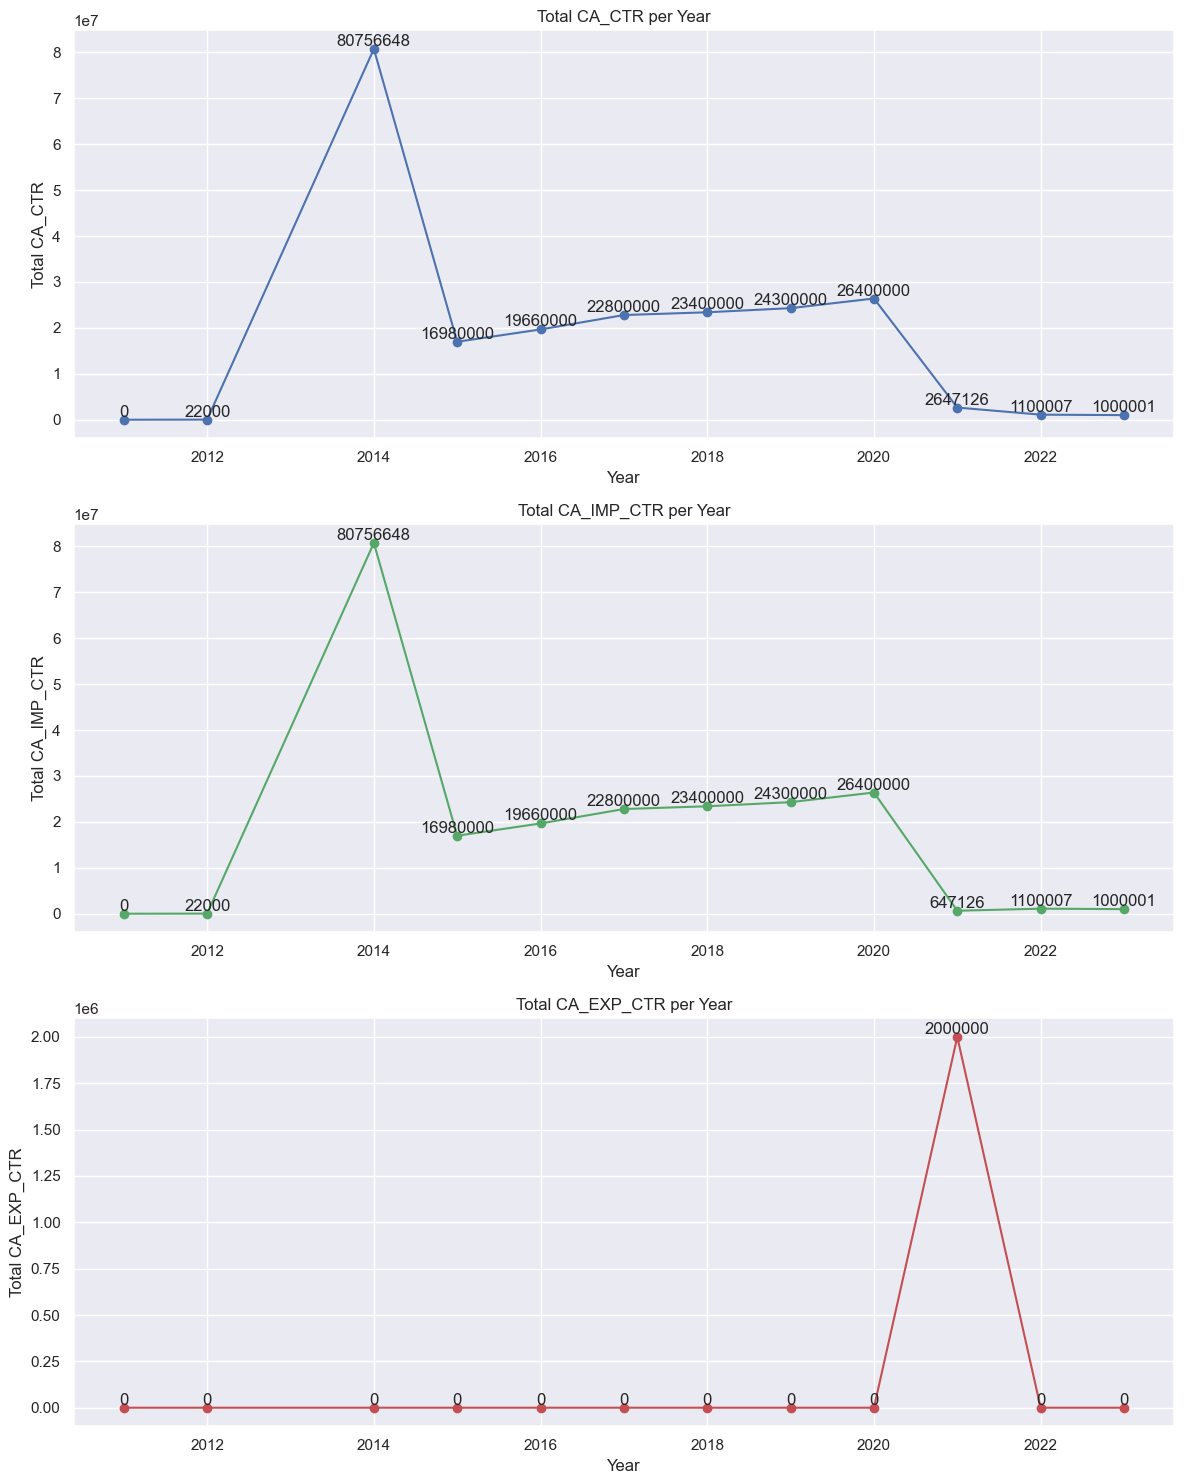

In [25]:
# Grouping data by year and calculating the sum of CA_CTR, CA_IMP_CTR, and CA_EXP_CTR
grouped_data = ctr_data.groupby(ctr_data['DAT_SIGN_CTR'].dt.year)[['CA_CTR', 'CA_IMP_CTR', 'CA_EXP_CTR']].sum()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot for CA_CTR
axs[0].plot(grouped_data.index, grouped_data['CA_CTR'], marker='o', linestyle='-', color='b')
for x, y in zip(grouped_data.index, grouped_data['CA_CTR']):
    axs[0].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total CA_CTR')
axs[0].set_title('Total CA_CTR per Year')

# Plot for CA_IMP_CTR
axs[1].plot(grouped_data.index, grouped_data['CA_IMP_CTR'], marker='o', linestyle='-', color='g')
for x, y in zip(grouped_data.index, grouped_data['CA_IMP_CTR']):
    axs[1].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total CA_IMP_CTR')
axs[1].set_title('Total CA_IMP_CTR per Year')

# Plot for CA_EXP_CTR
axs[2].plot(grouped_data.index, grouped_data['CA_EXP_CTR'], marker='o', linestyle='-', color='r')
for x, y in zip(grouped_data.index, grouped_data['CA_EXP_CTR']):
    axs[2].text(x, y, f"{y:.0f}", ha='center', va='bottom')

axs[2].set_xlabel('Year')
axs[2].set_ylabel('Total CA_EXP_CTR')
axs[2].set_title('Total CA_EXP_CTR per Year')

# Adjust the layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

From the visualizations, we can observe that:
- CA_CTR and CA_IMP_CTR share the same value so we can consider them as a single field.
- 2014 had seen a huge peak of gain in terms of sales amount.
- Total CA_EXP_CTR displays fluctuations over the years, indicating variability in exported contract amounts. It's obvious that all of the signed contracts don't focus mostly on the exported sales.

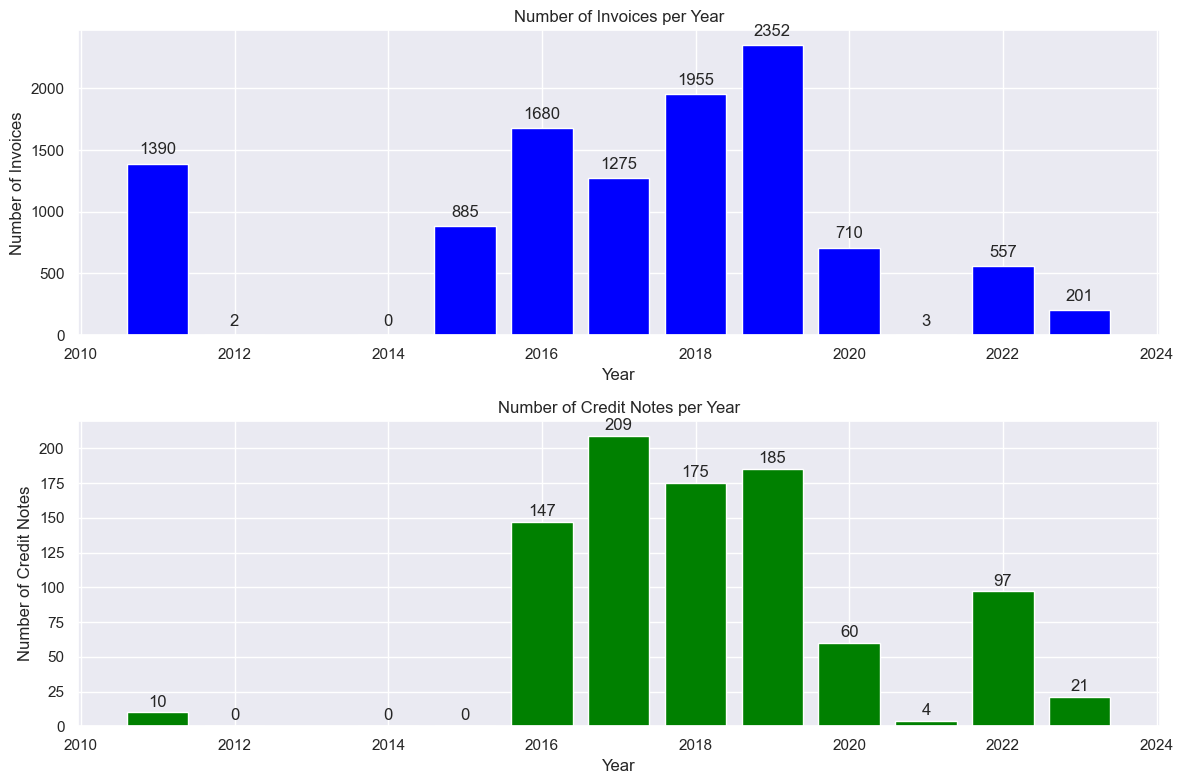

In [26]:
# Extracting the required data from the DataFrame
nb_fact_data = ctr_data["NB_FACT_PREVU_CTR"]
nb_avoir_data = ctr_data["NB_AVOIRS_PREVU_CTR"]
years = ctr_data["DAT_SIGN_CTR"].dt.year.unique()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting Number of Invoices (NB_FACT_PREVU_CTR) per year
ax1.bar(years, nb_fact_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum(), color='blue')
ax1.set_ylabel("Number of Invoices")
ax1.set_xlabel("Year")
ax1.set_title("Number of Invoices per Year")

# Adding values above each bar
for x, y in zip(years, nb_fact_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum()):
    ax1.text(x, y + 50, str(y), ha='center', va='bottom')

# Plotting Number of Credit Notes (NB_AVOIRS_PREVU_CTR) per year
ax2.bar(years, nb_avoir_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum(), color='green')
ax2.set_ylabel("Number of Credit Notes")
ax2.set_xlabel("Year")
ax2.set_title("Number of Credit Notes per Year")

# Adding values above each bar
for x, y in zip(years, nb_avoir_data.groupby(ctr_data["DAT_SIGN_CTR"].dt.year).sum()):
    ax2.text(x, y + 2, str(y), ha='center', va='bottom')

# Adjusting layout to avoid overlapping
plt.tight_layout()

# Displaying the subplots
plt.show()

In the first subplot, we observe that the number of invoices per contract generally increases over the years, with some fluctuations. This indicates that the volume of sales or transactions conducted by the company has been growing or fluctuating across different contracts during the observed period.

In the second subplot, the count of credit notes per contract appears to be relatively smaller compared to the number of invoices. However, it also exhibits a slight increasing trend over time, which suggests that there have been instances of customers receiving credit or refunds for various reasons.

### **Data Cleaning**

The cleaning phase in data preprocessing is crucial for ensuring data quality and reliability in any data analysis or machine learning project.

##### **Cleaning Worktools**

This section handles all the preparation methods for dealing with missing values and any unreliable data.

In [27]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drop one or multiple columns from a DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        columns_to_drop (str or list of str): The column name(s) to drop.
        
    Returns:
        pd.DataFrame: The DataFrame with the specified columns dropped.
    """
    if isinstance(columns_to_drop, str):
        columns_to_drop = [columns_to_drop]

    return dataframe.drop(columns=columns_to_drop, axis=1)


This method works on dropping the whole column(s) from the dataframe. It's going to be used once we encounter one or multiple fields that are fully null or most of the rows are null.

In [28]:
def drop_nan_rows(dataframe, subset):
    """
    Drop rows that contain NaN/NaT or all blank values (spaces) in the DataFrame.
    
    Parameters:
        dataframe: The input DataFrame.
        subset (list of str): The column names to consider when dropping rows.
        
    Returns:
        pd.DataFrame: The DataFrame with rows containing NaN or NaT values dropped.
    """
    # Drop rows with any NaN or NaT values
    dataframe = dataframe.dropna(subset=subset)

    # Drop rows where all values are blank spaces
    condition = dataframe.apply(lambda row: row.str.strip().eq('')).all(axis=1)
    dataframe = dataframe[~condition]

    return dataframe

This method serves to removing just a number of rows within a subset of fields that contains null values (NaN, NaT) or blank values.

In [29]:
def fill_missing_values(dataframe):
    """
    Replace missing values in a DataFrame with appropriate fill values based on data type.
    
    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.
    
    Parameters:
        dataframe: The input DataFrame.
        
    Returns:
        The DataFrame with missing values replaced.
    """
    # Replace blank spaces with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill missing values in numerical columns with the median
    numeric_columns = dataframe.select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())
    
    # Fill missing values in categorical columns with the most frequent value
    categorical_columns = dataframe.select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])
    
    return dataframe


This method is being defined to replace missing values in a DataFrame with appropriate fill values based on data type. As a choice, we are tending to replace the numerical columns with the median and the categorical columns with the most frequent values (the mode, statistically speaking)


In [30]:
def switch_if_negative_diff(dataframe, dt1, dt2):
    """
    Switches the values of datetime1 (dt1) and datetime2 (dt2) in the dataframe
    if datetime1 is greater than datetime2.

    Args:
        dataframe: the dataframe containing 'datetime1' and 'datetime2' columns.
        dt1 (str): the field's name representing the first datetime
        dt2 (str): the field's name representing the second datetime

    Returns:
        The permuted dataframe with switched datetime values if applicable.
    """
    mask = dataframe[dt1] > dataframe[dt2]
    dataframe.loc[mask, [dt1, dt2]] = dataframe.loc[mask, [dt2, dt1]].values
    dataframe[dt1] = dataframe[dt1].apply(pd.to_datetime)
    dataframe[dt2] = dataframe[dt2].apply(pd.to_datetime)
    return dataframe

The role of this method is toggling between 2 datetimes that have negative differential.

In [31]:
def interpolate_datetime_nulls(dataframe, column_name):
    """
    Replace null datetime values in a DataFrame column using time-based interpolation.

    Parameters:
        dataframe: The DataFrame containing the column with null datetime values.
        column_name (str): The name of the column with datetime values to interpolate.

    Returns:
        The DataFrame with null datetime values replaced by interpolated values.
    """
    # Convert the specified column to datetime dtype
    dataframe[column_name] = pd.to_datetime(dataframe[column_name])

    # Perform interpolation for missing values using 'bfill' method
    dataframe[column_name] = dataframe[column_name].fillna(method='bfill')

    # Perform interpolation for missing values using 'ffill' method
    dataframe[column_name] = dataframe[column_name].fillna(method='ffill')
    
    return dataframe

This method takes a DataFrame and the name of the column with datetime values that need interpolation. Interpolation is a mathematical method that estimates the missing values based on the known values surrounding them.

Pandas provides the `interpolate()` method, which can be used to perform linear or time-based interpolation on datetime columns.

The resulting DataFrame will have the null datetime values replaced with interpolated values based on the surrounding known values and the time differences between them.

In [32]:
def fetch_nan_columns(dataframe, threshold = 0.5):
    """
    Fetches the null columns and Separates the most nullified columns for the others.

    Parameters:
        dataframe: The DataFrame containing the column with null values.
        threshold (float): A metric with which we separate the dataframe 
                           based upon holding missing values.

    Returns:
        Two lists of columns names.
    """
    # Store the number of null values within a dataframe df
    df = pd.DataFrame(dataframe.isna().sum(), columns=['Nb_null'])

    # Separate the number of nuls that surpass the length of the dataframe
    cols_to_drop = df[df['Nb_null'] > dataframe.shape[0] * threshold]

    # Separate the number of nuls that are less than the length of the dataframe except 0
    cols_to_manipulate_nan = df[(df['Nb_null'] <= dataframe.shape[0] * threshold) & (df['Nb_null'] > 0)]

    # Return just the name of columns
    return cols_to_drop.index, cols_to_manipulate_nan.index

This method stands out as a way of retrieving the columns that have missing values

In [33]:
def fill_missing_values_subset(dataframe, subset_columns):
    """
    Replace missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

    For numerical columns, the missing values will be filled with the median.
    For categorical columns, the missing values will be filled with the most frequent value.

    Args:
        dataframe: The input DataFrame.
        subset_columns: List of column names to fill missing values in.

    Returns:
        The DataFrame with missing values replaced for the specified subset of columns.
    """
    # Fill missing values in numerical columns of the subset with the median
    numeric_columns = dataframe[subset_columns].select_dtypes(include=[np.number])
    dataframe[numeric_columns.columns] = dataframe[numeric_columns.columns].fillna(numeric_columns.median())

    # Fill missing values in categorical columns of the subset with the most frequent value
    categorical_columns = dataframe[subset_columns].select_dtypes(include=['object'])
    dataframe[categorical_columns.columns] = dataframe[categorical_columns.columns].fillna(categorical_columns.mode().iloc[0])

    return dataframe

This method replaces missing values in a subset of columns of a DataFrame with appropriate fill values based on data type.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

def replace_nan_with_knn_classifier(dataframe, target_column, n_neighbors=5):
    """
    Replace NaN values in the target column of the DataFrame using k-Nearest Neighbors (k-NN) classification for prediction.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the column containing NaN values to be predicted. Default is 'LOGIN_USER'.
        n_neighbors (int): The number of neighbors to consider for k-NN classification. Default is 5.

    Returns:
        pd.DataFrame: The DataFrame with NaN values in the specified column replaced with predicted values.
    """
    # Make a copy of the original DataFrame
    df_copy = dataframe.copy()

    # Store the data types of datetime columns for conversion back after label encoding
    datetime_columns = df_copy.select_dtypes(include='datetime64').columns

    # Drop datetime columns temporarily
    df_copy.drop(columns=datetime_columns, inplace=True)

    # Label encode all the categorical columns
    label_encoder = LabelEncoder()
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.fit_transform(df_copy[col].astype(str))

    # Separate the DataFrame into null and non-null values in the target column
    df_not_null = df_copy.dropna(subset=[target_column])
    df_null = df_copy[df_copy[target_column].isnull()]

    # Check if there are non-null values in the target column
    if len(df_not_null) == 0:
        raise ValueError("No non-null values found in the target column.")

    # Features and target for non-null values
    features_not_null = df_not_null.drop(target_column, axis=1)
    target_not_null = df_not_null[target_column]

    # Fit the non-null values to the k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(features_not_null, target_not_null)

    # Reorder columns in df_null to match the order of features_not_null
    df_null_reordered = df_null[features_not_null.columns]
    print(df_null.head())
    print(len(df_null) > 0)
    # Check if there are any null values to predict
    if len(df_null) > 0:
        # Predict the null values in the target column
        predicted_labels = knn_classifier.predict(df_null_reordered)

        # Convert the predicted labels back to original categorical values using the original label encoder
        predicted_values = label_encoder.inverse_transform(predicted_labels)
        print(predicted_values)
        # Replace NaN values in the target column with predicted values
        df_copy.loc[df_copy[target_column].isnull(), target_column] = predicted_values

    # Convert the target column back to the original labels
    for col in df_copy.select_dtypes(include='object'):
        df_copy[col] = label_encoder.inverse_transform(df_copy[col])

    # Restore the datetime columns
    for col in datetime_columns:
        df_copy[col] = dataframe[col]

    return df_copy


This method works on replacing NaN values in a specific column of the DataFrame using k-Nearest Neighbors (k-NN) imputation.

In [35]:
def replace_label_encoded_values(df_encoded, df_categorical, target_column):
    """
    Replace label encoded values in the DataFrame 'df_encoded' with the corresponding categorical values from 'df_categorical'.

    Parameters:
        df_encoded (pd.DataFrame): The DataFrame containing label encoded values to be replaced.
        df_categorical (pd.DataFrame): The DataFrame containing the corresponding categorical values.
        target_column (str): The name of the target column to replace the values.

    Returns:
        pd.DataFrame: The DataFrame 'df_encoded' with the label encoded values replaced by the categorical values.
    """
    # Create a mapping dictionary to store label encoded values and their corresponding alphabetical values
    mapping = {}

    # Iterate over the target column in both DataFrames simultaneously
    for encoded_val, categorical_val in zip(df_encoded[target_column], df_categorical[target_column]):
        if not pd.isna(encoded_val) and not pd.isna(categorical_val):
            # Store the mapping of label encoded value to the corresponding alphabetical value
            mapping[encoded_val] = categorical_val

    # Replace label encoded values with their corresponding categorical values
    df_encoded[target_column] = df_encoded[target_column].replace(mapping)

    return df_encoded


##### **Contract Table**

In [36]:
cols_to_drop, cols_to_inpute = fetch_nan_columns(ctr_data)
ctr_data[cols_to_drop].isna().sum()

SERVICE_CTR      126
MIN_COMM_FACT    104
dtype: int64

In [37]:
ctr_data[cols_to_inpute].isna().sum()

REF_CTR_PAPIER_CTR     5
DAT_RESIL_CTR         23
DAT_PROCH_VERS_CTR     1
DELAI_MAX_REG_CTR      1
FACT_REG_CTR          22
DERN_MONT_DISP_2      24
dtype: int64

Just stored the columns that are going to be fully dropped in cols_to_drop and the rest of the columns that have some null values in cols_to_inpute

In [38]:
ctr_data = drop_columns(dataframe=ctr_data, columns_to_drop=cols_to_drop)
ctr_data.isna().sum()

REF_CTR                  0
STATUT_CTR               0
REF_CTR_PAPIER_CTR       5
TYP_CTR                  0
DAT_SIGN_CTR             0
DAT_DEB_CTR              0
DAT_RESIL_CTR           23
DAT_PROCH_VERS_CTR       1
CA_CTR                   0
CA_EXP_CTR               0
CA_IMP_CTR               0
LIM_FIN_CTR              0
DEVISE_CTR               0
NB_ACH_PREVU_CTR         0
NB_FACT_PREVU_CTR        0
NB_AVOIRS_PREVU_CTR      0
NB_REMISES_PREVU_CTR     0
DELAI_MOYEN_REG_CTR      0
DELAI_MAX_REG_CTR        1
FACT_REG_CTR            22
DERN_MONT_DISP_2        24
dtype: int64

We successfully removed the variables that are filled mostly with NaNs

In [39]:
# Fetch all datetimes variables
dat_vars = [col for col in ctr_data.columns if col.startswith('DAT')]

# Inspect dat_vars
dat_vars

['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR']

According to the exploratory analysis made earlier, we need to replace all the null values first. Then, do some permutation for the ones that have negative differentials.

In [40]:
ctr_data[['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR']].head()

,DAT_SIGN_CTR,DAT_DEB_CTR,DAT_RESIL_CTR,DAT_PROCH_VERS_CTR
0,2014-04-01,2014-04-01,NaT,NaT
1,2014-01-27,2014-01-27,2014-02-11,2014-02-11
2,2014-01-27,2014-01-27,2014-02-11,2014-02-11
3,2014-01-27,2014-01-27,2014-02-12,2014-02-12
4,2014-02-12,2014-02-12,2014-02-12,2014-02-12


Alongside the existence of null values for datetimes, we have to remember back that there are about 4 negative differentials between 'DAT_DEB_CTR' and 'DAT_RESIL_CTR'(DAT_RESIL_CTR comes before DAT_DEB_CTR) and this should not happen. Also, there is 1 negative differential between 'DAT_DEB_CTR' and 'DAT_SIGN_CTR' (DAT_DEB_CTR comes before DAT_SIGN_CTR). So to deal with that, we will, in the first hand, interpolate all the NaTs, then we will be flipping the position of the corresponding dates.

In [41]:
# Interpose null datetimes DAT_RESIL_CTR and DAT_PROCH_VERS_CTR (only these have NaTs)
ctr_data = interpolate_datetime_nulls(ctr_data, 'DAT_RESIL_CTR')
ctr_data = interpolate_datetime_nulls(ctr_data, 'DAT_PROCH_VERS_CTR')

# Check missing values again in DAT_RESIL_CTR and DAT_PROCH_VERS_CTR
ctr_data[['DAT_RESIL_CTR', 'DAT_PROCH_VERS_CTR']].isna().sum()

DAT_RESIL_CTR         0
DAT_PROCH_VERS_CTR    0
dtype: int64

NOTICE TIME: you may or may not noticed that in this notebook I have altered a little bit the `interpolate_datetime_nulls()` function as the null values in the DAT_RESIL_CTR column are densely distributed, so back-fill (bfill) won't do all the job. That's why, the interpolation process is being powered by another method forward-fill (ffill)

In [42]:
# Calculate the differential between DAT_SIGN_CTR and DAT_DEB_CTR
ctr_data['Date_Diff'] = (ctr_data['DAT_DEB_CTR'] - ctr_data['DAT_SIGN_CTR']).dt.days

# Inspect 5 last samples of negative differentials
ctr_data[ctr_data['Date_Diff'] < 0][['DAT_SIGN_CTR', 'DAT_DEB_CTR', 'Date_Diff']].tail()

,DAT_SIGN_CTR,DAT_DEB_CTR,Date_Diff
37,2015-11-28,2015-11-25,-3


In [43]:
# Switch negative differentials
ctr_data = switch_if_negative_diff(ctr_data, 'DAT_SIGN_CTR', 'DAT_DEB_CTR')

# Verify output
print(ctr_data.iloc[37][['DAT_SIGN_CTR', 'DAT_DEB_CTR']])

# Dropping the newly-created column 
ctr_data = ctr_data.drop(['Date_Diff'], axis=1)

DAT_SIGN_CTR    2015-11-25 00:00:00
DAT_DEB_CTR     2015-11-28 00:00:00
Name: 37, dtype: object


In [44]:
# Calculate the differential between DAT_DEB_CTR and DAT_RESIL_CTR
ctr_data['Date_Diff'] = (ctr_data['DAT_RESIL_CTR'] - ctr_data['DAT_DEB_CTR']).dt.days

# Inspect 5 last samples of negative differentials
ctr_data[ctr_data['Date_Diff'] < 0][['DAT_DEB_CTR', 'DAT_RESIL_CTR', 'Date_Diff']].tail()

,DAT_DEB_CTR,DAT_RESIL_CTR,Date_Diff
121,2022-01-01,2021-08-31,-123
122,2022-10-28,2021-08-31,-423
123,2023-01-30,2021-08-31,-517
124,2023-02-24,2021-08-31,-542
125,2023-06-11,2021-08-31,-649


In [45]:
# Switch negative differentials
ctr_data = switch_if_negative_diff(ctr_data, 'DAT_DEB_CTR', 'DAT_RESIL_CTR')

# Verify output
print(ctr_data.iloc[[121, 122, 123, 124, 125]][['DAT_DEB_CTR',	'DAT_RESIL_CTR']])

# Dropping the newly-created column 
ctr_data = ctr_data.drop(['Date_Diff'], axis=1)

    DAT_DEB_CTR DAT_RESIL_CTR
121  2021-08-31    2022-01-01
122  2021-08-31    2022-10-28
123  2021-08-31    2023-01-30
124  2021-08-31    2023-02-24
125  2021-08-31    2023-06-11


I used backward fill (bfill) and forward fill to eliminate null time-based data then flipped them off. It's time to fill the null values with either median for numerical columns or mode for categorical variables. But before delving into that, I want to:
1. adjust the values of REF_CTR_PAPIER_CTR as they are not all correctly presented
2. remove the row of index 92 of DERN_MONT_DISP_2 as it represents a single anomaly
3. stripe extra spaces in the STATUT_CTR column

In [46]:
ctr_data['REF_CTR_PAPIER_CTR'].dtype

dtype('O')

In [47]:
ctr_data['REF_CTR_PAPIER_CTR'].head(30)

0     001/2014
1     001/2014
2     002/2014
3     004/2014
4     003/2013
5     005/2014
6     006/2014
7     003/2014
8     007/2014
9          NaN
10         NaN
11     0022014
12    001/2014
13    004/2014
14    003/2014
15    005/2014
16    003/2013
17    006/2014
18    008/2014
19         NaN
20         NaN
21    012/2014
22         013
23    009/2014
24         NaN
25     01/2015
26    002/2015
27     26/2014
28          41
29     29-2014
Name: REF_CTR_PAPIER_CTR, dtype: object

In [48]:
# Define a function to transform the values in REF_CTR_PAPIER_CTR
def transform_ref_ctr(value):
    if pd.notna(value):
        value = ''.join(filter(str.isdigit, str(value)))  # Remove symbols
        if len(value) < 7:
            return np.nan
        elif len(value) == 7:
            return value[:3] + '/' + value[3:]
    return value

# Apply the function to the column
ctr_data['REF_CTR_PAPIER_CTR'] = ctr_data['REF_CTR_PAPIER_CTR'].apply(transform_ref_ctr)

ctr_data['REF_CTR_PAPIER_CTR'].head(30)

0     001/2014
1     001/2014
2     002/2014
3     004/2014
4     003/2013
5     005/2014
6     006/2014
7     003/2014
8     007/2014
9          NaN
10         NaN
11    002/2014
12    001/2014
13    004/2014
14    003/2014
15    005/2014
16    003/2013
17    006/2014
18    008/2014
19         NaN
20         NaN
21    012/2014
22         NaN
23    009/2014
24         NaN
25         NaN
26    002/2015
27         NaN
28         NaN
29         NaN
Name: REF_CTR_PAPIER_CTR, dtype: object

In [49]:
# Drop row 92
ctr_data = ctr_data.drop(92)

# Verification
ctr_data.iloc[92]

REF_CTR                                 112
STATUT_CTR                            V    
REF_CTR_PAPIER_CTR                 011/2019
TYP_CTR                                   0
DAT_SIGN_CTR            2019-04-16 00:00:00
DAT_DEB_CTR             2019-04-16 00:00:00
DAT_RESIL_CTR           2019-04-16 00:00:00
DAT_PROCH_VERS_CTR      2019-04-16 00:00:00
CA_CTR                            1000000.0
CA_EXP_CTR                              0.0
CA_IMP_CTR                        1000000.0
LIM_FIN_CTR                        250000.0
DEVISE_CTR                              TND
NB_ACH_PREVU_CTR                         10
NB_FACT_PREVU_CTR                        20
NB_AVOIRS_PREVU_CTR                      10
NB_REMISES_PREVU_CTR                     20
DELAI_MOYEN_REG_CTR                      90
DELAI_MAX_REG_CTR                      90.0
FACT_REG_CTR                           True
DERN_MONT_DISP_2                        0.0
Name: 93, dtype: object

In [50]:
# Remove extra spaces within STATUT_CTR
ctr_data['STATUT_CTR'] = ctr_data['STATUT_CTR'].str.strip()

Now, let's fill out the missing values

In [51]:
ctr_data = fill_missing_values(ctr_data)

# Re-check missing values 
ctr_data.isna().sum()

REF_CTR                 0
STATUT_CTR              0
REF_CTR_PAPIER_CTR      0
TYP_CTR                 0
DAT_SIGN_CTR            0
DAT_DEB_CTR             0
DAT_RESIL_CTR           0
DAT_PROCH_VERS_CTR      0
CA_CTR                  0
CA_EXP_CTR              0
CA_IMP_CTR              0
LIM_FIN_CTR             0
DEVISE_CTR              0
NB_ACH_PREVU_CTR        0
NB_FACT_PREVU_CTR       0
NB_AVOIRS_PREVU_CTR     0
NB_REMISES_PREVU_CTR    0
DELAI_MOYEN_REG_CTR     0
DELAI_MAX_REG_CTR       0
FACT_REG_CTR            0
DERN_MONT_DISP_2        0
dtype: int64

To assure more readability to TYP_CTR, I will replace:
- 0: Avec recours
- 1: Confidentiel
- 2: Sans recours

In [52]:
# Define a function to transform the values in TYP_CTR
def transform_typ_ctr(value):
    if value == 0:
        return 'Avec recours'
    elif value == 1:
        return 'Confidentiel'
    return 'Sans recours'

# Apply the function to the column
ctr_data['TYP_CTR'] = ctr_data['TYP_CTR'].apply(transform_typ_ctr)

ctr_data['TYP_CTR'].sample(5)

105    Confidentiel
91     Avec recours
37     Avec recours
118    Confidentiel
9      Avec recours
Name: TYP_CTR, dtype: object

Great output .. everything goes well so far. Let's finish with some more exploration.

In [53]:
# Get numerical columns
numerical_columns = ctr_data.select_dtypes(include=[np.number])

# Check if all values in numerical columns are less than 0
if (numerical_columns >= 0).all().all():
    print("All numerical columns have values greater or equal 0.")
else:
    print("Not all numerical columns have values greater or equal 0.")


All numerical columns have values greater or equal 0.


In [54]:
# Check whether LIM_FIN_CTR ais greater than CA_CTR
ctr_data[ctr_data['LIM_FIN_CTR'] > ctr_data['CA_CTR']][['LIM_FIN_CTR', 'CA_CTR']]

,LIM_FIN_CTR,CA_CTR
19,1500000.0,150000.0


In [55]:
# Drop this row
ctr_data = ctr_data.drop(19)

# Check whether LIM_FIN_CTR ais greater than CA_CTR
ctr_data[ctr_data['LIM_FIN_CTR'] > ctr_data['CA_CTR']][['LIM_FIN_CTR', 'CA_CTR']]

,LIM_FIN_CTR,CA_CTR


The file is good to be downloaded now.

In [56]:
# Export the cleaned DataFrame
ctr_data.to_csv('T_CONTRAT2.csv', index=False)